# Лабораторная работа №1

*Работу выполнили студенты 19ПМИ-2: Созинов К.И. и Бирина Е.С.*

Для начала  подключаем библиотеки:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Загружаем исходный датасет:

In [3]:
df = pd.read_csv("C:/Users/ciril/Datasets/turkiye-student-evaluation_generic.csv")

Смотрим как он выглядит:

In [6]:
df

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,3,13,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5816,3,13,1,3,4,4,4,4,4,4,...,5,5,5,5,4,5,5,5,5,5
5817,3,13,1,0,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
5818,3,13,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


## Вступление и первый взгляд на данные

- Итак, этот набор данных содержит в общей сложности 5820 оценок, полученных студентами Университета Гази в Анкаре (Турция). Всего есть 28 вопросов по курсу и 5 дополнительных атрибутов, среди которых идентификатор преподавателя, номер группы, количество повторений курса у студента, уровень посещаемости и сложность курса.
- Работать предстоит лишь с количественными данными, категориальные отсутствуют.
- Сразу заметно, что некоторые ставили одинаковые оценки в целых группах вопросов. Это значит что придется поработать с первичной обработкой данных.
- Анализ этих данных может помочь выявить сильные и слабые стороны как и конкретных преподавателей, так и всех их вместе. Также можно будет подметить какая доля студентов отказалось честно отвечать на вопросы и ставила бессмыслицу.

## Основная группа (9)

Основной группой для анализа выбрана 9 группа:

In [214]:
df[df["class"]==9]

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
4466,3,9,3,0,5,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4467,3,9,3,3,4,4,4,3,4,4,...,3,3,3,3,3,3,3,3,3,3
4468,3,9,3,3,3,3,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
4469,3,9,3,1,4,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
4470,3,9,3,0,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5032,3,9,1,4,3,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
5033,3,9,1,1,2,1,1,4,4,4,...,4,4,4,4,4,4,4,4,4,4
5034,3,9,1,3,3,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,3
5035,3,9,1,0,1,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


С помощью этих данных мы сможем найти кол-во студентов в 9 классе, которые давали оценки на вопросы 1-28, средние оценки, общую сложность данного курса, также можно узнать сколько раз в среднем проходился данный курс для усвоение материала и др.

<AxesSubplot:>

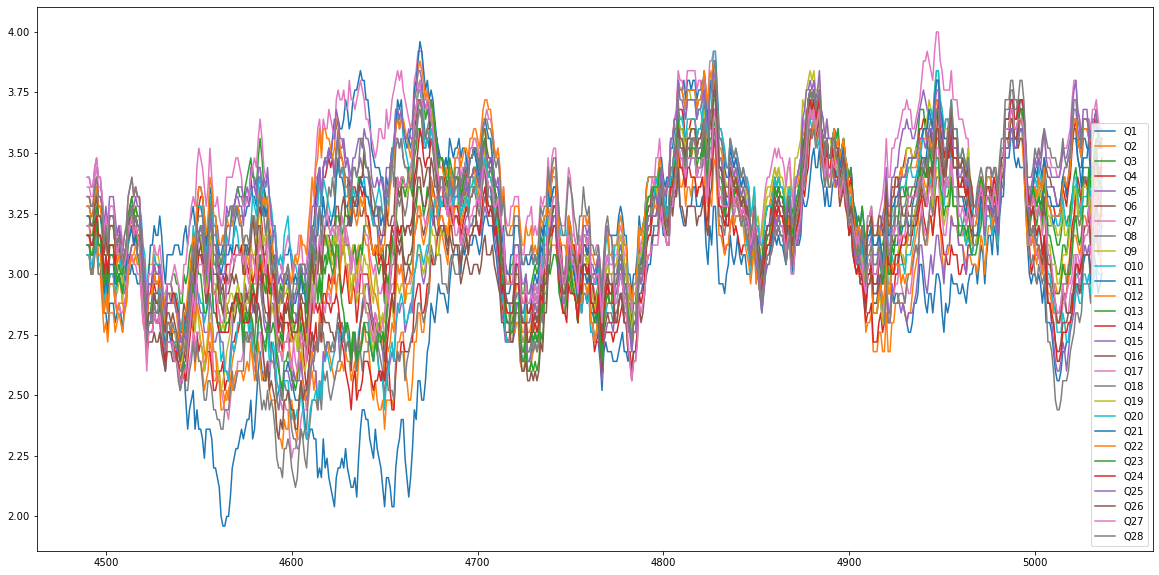

In [215]:
gr9 = df[df["class"]==9]
gr9_q = gr9.loc[:, "Q1":"Q28"]
gr9_q.rolling(window=25).mean().plot(figsize=(20, 10))

In [179]:
import seaborn as sns

## Анализ на выбросы 

Для анализа на выбросы полезным будет обратить внимание на график boxplot

<AxesSubplot:>

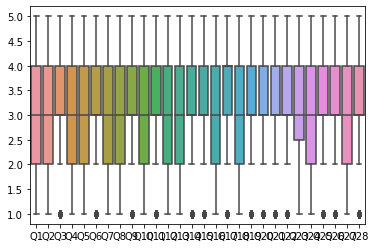

In [216]:
sns.boxplot(data=gr9_q)

Сначала уберем строки-дубликаты, которых в исходном датасете более чем достаточно:

In [243]:
key = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10','Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18','Q19','Q20','Q21','Q22','Q23','Q24','Q25','Q26','Q27','Q28']
gr9_dedupped = gr9.drop_duplicates(subset=key)
gr9_dedupped

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
4466,3,9,3,0,5,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4467,3,9,3,3,4,4,4,3,4,4,...,3,3,3,3,3,3,3,3,3,3
4468,3,9,3,3,3,3,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
4469,3,9,3,1,4,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
4471,3,9,3,0,3,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5029,3,9,1,3,1,1,2,3,1,3,...,3,4,4,2,5,3,2,3,3,4
5030,3,9,1,2,3,2,2,2,2,2,...,3,3,3,3,3,3,3,3,3,3
5033,3,9,1,1,2,1,1,4,4,4,...,4,4,4,4,4,4,4,4,4,4
5034,3,9,1,3,3,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,3


Как можем заметить, было удалено 284 строк. Теперь вспомним про boxplot и удалим строки, в которых есть значения, выходящие за пределы "усиков".

Во многих вопросах график определяет значение 1 как выброс, однако было бы неправильно в случае одной или нескольких единиц удалять весь ответ студента. Поэтому мы удаляем только те строки, в которых количество единиц не менее 10.

In [242]:
k = 0
for i, row in gr9_dedupped.iterrows():
    for col in gr9_dedupped:
        if col != "Q1" and col != "Q2" and col != "Q4" and col != "Q5" and col != "Q7" and col != "Q8" and col != "Q10" and col != "Q12" and col != "Q13" and col != "Q16" and col != "Q18" and col != "Q23" and col != "Q24" and col != "Q27" and col != "instr" and col != "class" and col != "attendance" and col != "difficulty" and col != "nb.repeat":
            if row[col] == 1:
                k+=1
    if k >= 10:
        gr9_dedupped["Q1"][i] = np.nan
    k = 0
gr9_clear = gr9_dedupped.dropna()
gr9_clear

<ipython-input-242-9e7072026fdb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gr9_dedupped["Q1"][i] = np.nan
D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
4466,3,9,3,0,5,3.0,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4467,3,9,3,3,4,4.0,4,3,4,4,...,3,3,3,3,3,3,3,3,3,3
4468,3,9,3,3,3,3.0,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
4469,3,9,3,1,4,2.0,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
4471,3,9,3,0,3,5.0,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5029,3,9,1,3,1,1.0,2,3,1,3,...,3,4,4,2,5,3,2,3,3,4
5030,3,9,1,2,3,2.0,2,2,2,2,...,3,3,3,3,3,3,3,3,3,3
5033,3,9,1,1,2,1.0,1,4,4,4,...,4,4,4,4,4,4,4,4,4,4
5034,3,9,1,3,3,2.0,2,2,2,2,...,2,2,2,2,2,2,2,2,2,3


Таким образом, было убрано еще 12 нежелательных строк с данными.

## Анализ на основе описательных статистик:

При помощи метода decribe() получаем список описательных статистик:

In [220]:
gr9_clear.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,275.0,275.0,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,...,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,3.0,9.0,1.360000,1.720000,2.814545,2.574545,2.934545,3.334545,3.018182,2.974545,...,3.338182,3.498182,3.534545,3.578182,3.243636,3.098182,3.530909,3.280000,3.225455,3.530909
std,0.0,0.0,0.654463,1.426342,1.192345,1.260318,1.185099,1.020272,1.191376,1.215505,...,1.069738,1.064951,1.074627,0.983568,1.124830,1.137209,1.040226,1.089834,1.117253,1.078129
min,3.0,9.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.0,9.0,1.000000,0.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000
50%,3.0,9.0,1.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000
75%,3.0,9.0,2.000000,3.000000,4.000000,3.500000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.0,9.0,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Среднее
- Среднее значение количества прохождений курса равно 1.36, в основном все студенты проходят его с первого раза. 
- Можно выделить уровень посещаемости студентов как достаточно низкий, а именно 1.72 по шкале от 0 до 4
- Средняя сложность 2.81 по шкале (1-5)
- Из средних значений по вопросам можно сделать вывод, что на данном курсе был достаточно пунктуальный учитель, исходя из того, что на 17 вопросе наибольшее среднее значение среди оценок, тем не менее, учитель вначале не донес до учеников, что нужно конкретно делать по данному предмету и не было дано четкого плана обучения.

In [256]:
gr9_clear.loc[:,"Q1":"Q28"].mean().mean()

3.2357142857142853

<AxesSubplot:>

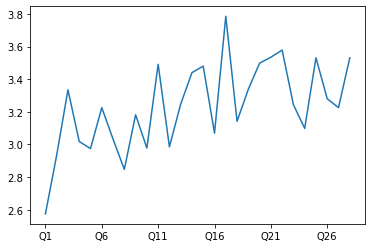

In [221]:
gr9_clear.loc[:,"Q1":"Q28"].mean().plot()

По графику можно заметить постепенный рост среднего значения от первого вопроса к последнему.

### Стандартное отклонение 

<AxesSubplot:>

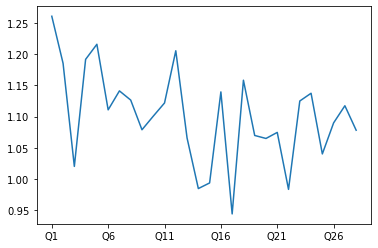

In [255]:
gr9_clear.loc[:,"Q1":"Q28"].std().plot()

Кроме довольно медленного, но всё же снижения значения стандартного отклонения график позволяет увидеть, что данная описательная статистика имеет наибольшее значение в Q1, а наименьшие в Q17.

### Квартили

<AxesSubplot:>

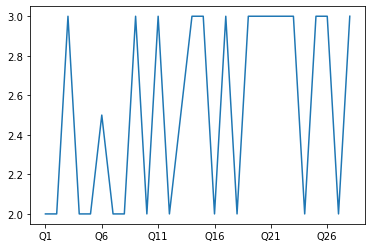

In [229]:
gr9_clear.loc[:,"Q1":"Q28"].quantile(0.25).plot()

In [230]:
gr9_clear.loc[:,"Q1":"Q28"].quantile(0.25).mean()

2.5357142857142856

<AxesSubplot:>

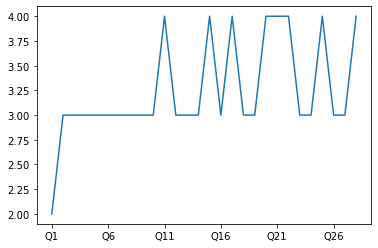

In [227]:
gr9_clear.loc[:,"Q1":"Q28"].quantile(0.5).plot()

<AxesSubplot:>

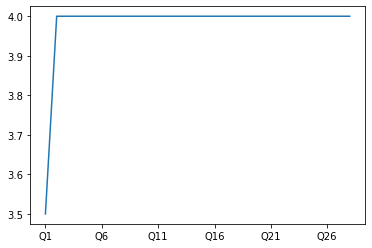

In [228]:
gr9_clear.loc[:,"Q1":"Q28"].quantile(0.75).plot()

- Значение квартиля 25% очень нестабильно, его среднее значение равно 2.54. 
- Значение квартиля 50% лишь у Q1 равно 2, у остальных 3 и 4
- Квартиль 75% показывает самый интересный результат: кроме Q1 значения у остальных вопросов равны 4, т.е. 75% студентов имеют оценку меньшую или равную 4

 К сожалению, ни минимум, ни максимум, ни медиана не дают интересной для анализа информации.

### Анализ матрицы корреляций

In [231]:
gr9_clear.corr()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
instr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nb.repeat,NaN,NaN,1.000000,-0.075379,0.118608,-0.034867,-0.110674,-0.109971,-0.106721,-0.057256,...,-0.148466,-0.064513,-0.103370,-0.069397,-0.099748,-0.042760,-0.158468,-0.065087,-0.061493,-0.044276
attendance,NaN,NaN,-0.075379,1.000000,0.396404,-0.027936,0.008550,-0.013141,-0.042095,0.016925,...,0.150787,0.084959,0.114671,0.126224,0.115468,0.107011,0.075958,0.027141,0.035178,0.106514
difficulty,NaN,NaN,0.118608,0.396404,1.000000,-0.096414,-0.083524,-0.083817,-0.118370,-0.154361,...,0.006430,-0.018949,0.017836,0.088653,-0.034218,0.032319,0.020822,-0.016065,0.039720,-0.005461
Q1,NaN,NaN,-0.034867,-0.027936,-0.096414,1.000000,0.738776,0.409113,0.629845,0.569443,...,0.323671,0.248228,0.287099,0.269827,0.359148,0.334821,0.217462,0.273044,0.306824,0.220561
Q2,NaN,NaN,-0.110674,0.008550,-0.083524,0.738776,1.000000,0.576583,0.649659,0.677844,...,0.472381,0.370053,0.391523,0.398919,0.488391,0.427240,0.404277,0.423976,0.377788,0.341505
Q3,NaN,NaN,-0.109971,-0.013141,-0.083817,0.409113,0.576583,1.000000,0.502402,0.504243,...,0.427645,0.309585,0.405509,0.366624,0.383479,0.374214,0.413192,0.453740,0.324199,0.365487
Q4,NaN,NaN,-0.106721,-0.042095,-0.118370,0.629845,0.649659,0.502402,1.000000,0.627864,...,0.321616,0.257477,0.325906,0.277535,0.383407,0.375805,0.316123,0.285584,0.290291,0.248182
Q5,NaN,NaN,-0.057256,0.016925,-0.154361,0.569443,0.677844,0.504243,0.627864,1.000000,...,0.447316,0.384818,0.390446,0.332892,0.557108,0.490269,0.345556,0.459986,0.477233,0.358472


<AxesSubplot:>

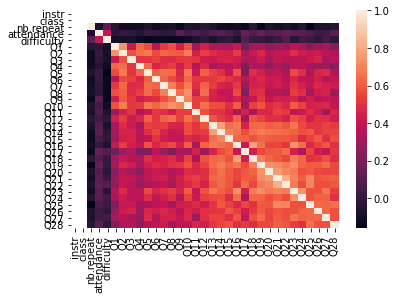

In [252]:
corr = gr9_clear.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Естественно, там где высокая корреляция - вопросы и ответы на них тесно связаны друг с другом. Например, вопрос 20 и 21: то, что преподаватель был готов помогать студентам показало, что читель показал положительный подход к учинекам. Также можно выделить вопросы 25 и 21: то, что преподаватель готов был отвечать на вопросы по курсу в любое время показывает положительный подход к студентам и т.д.

## Анализ вспомогательной группы (11)

In [155]:
gr11 = df[df["class"] == 11]
gr11

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
1636,2,11,3,2,3,3,2,4,3,2,...,4,4,4,4,3,2,4,2,3,3
1637,2,11,1,0,3,2,2,3,3,3,...,4,4,4,4,4,4,4,3,4,4
1638,2,11,1,4,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
1639,2,11,1,3,3,1,3,2,2,3,...,5,5,5,5,5,3,4,2,1,3
1640,2,11,2,3,3,1,1,1,1,1,...,3,3,2,3,1,1,5,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,2,11,1,1,4,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2116,2,11,1,4,5,3,3,3,3,3,...,4,4,5,5,4,4,3,2,1,1
2117,2,11,1,3,5,5,1,1,5,5,...,5,5,5,5,5,1,5,5,1,1
2118,2,11,2,2,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


<AxesSubplot:>

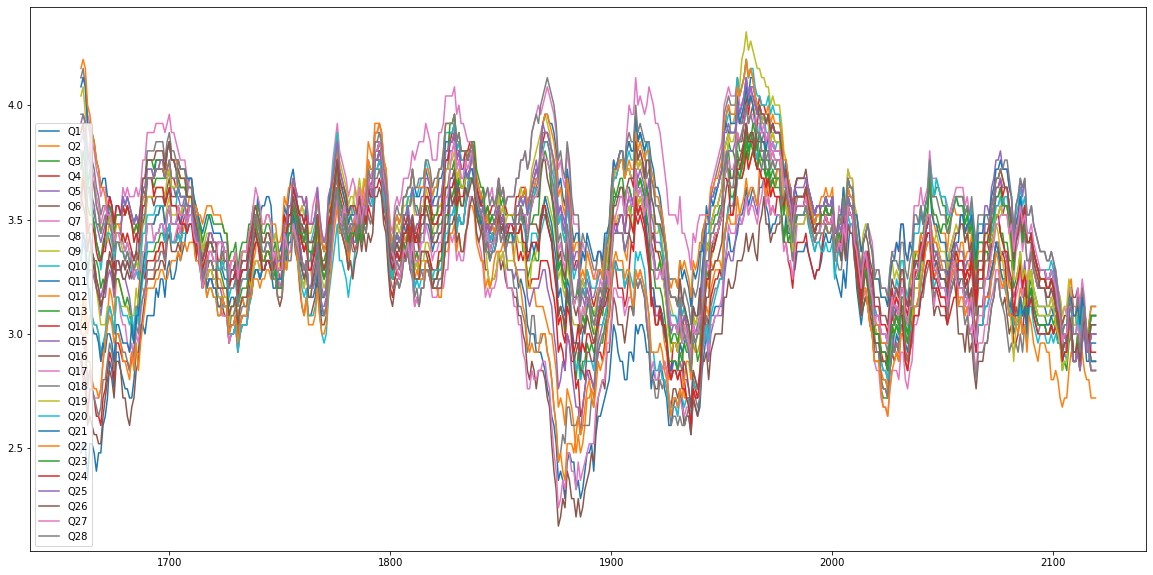

In [140]:
gr11_q = gr11.loc[:, "Q1":"Q28"]
gr11_q.rolling(window=25).mean().plot(figsize=(20, 10))

## Анализ на выбросы

Для анализа на выбросы полезным будет обратить внимание на график boxplot

<AxesSubplot:>

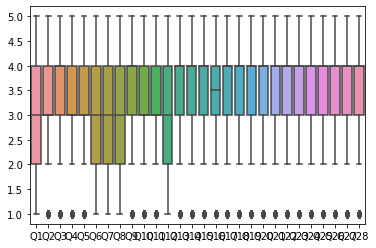

In [180]:
sns.boxplot(data=gr11_q)

Сначала уберем строки-дубликаты, которых в исходном датасете более чем достаточно:

In [159]:
key = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10','Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18','Q19','Q20','Q21','Q22','Q23','Q24','Q25','Q26','Q27','Q28',]
gr11_dedupped = gr11.drop_duplicates(subset=key)
gr11_dedupped

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
1636,2,11,3,2,3,3.0,2,4,3,2,...,4,4,4,4,3,2,4,2,3,3
1637,2,11,1,0,3,2.0,2,3,3,3,...,4,4,4,4,4,4,4,3,4,4
1638,2,11,1,4,4,5.0,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
1639,2,11,1,3,3,1.0,3,2,2,3,...,5,5,5,5,5,3,4,2,1,3
1640,2,11,2,3,3,NaN,1,1,1,1,...,3,3,2,3,1,1,5,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,2,11,1,3,5,3.0,3,3,3,3,...,3,3,3,3,3,3,3,4,4,4
2105,2,11,1,4,4,4.0,4,4,4,4,...,4,4,4,4,4,4,3,4,4,4
2111,2,11,1,4,4,2.0,3,4,3,5,...,4,4,4,4,4,4,4,4,4,4
2116,2,11,1,4,5,3.0,3,3,3,3,...,4,4,5,5,4,4,3,2,1,1


Как можем заметить, было удалено 257 строк. Теперь вспомним про boxplot и удалим строки, в которых есть значения, выходящие за пределы "усиков".

Для практически всех вопросов ответ 1 является выбросом, однако было бы неправильно в случае одной или нескольких единиц удалять весь ответ студента. Поэтому мы удаляем только те строки, в которых количество единиц не менее 10.

In [176]:
k = 0
for i, row in gr11_dedupped.iterrows():
    for col in gr11_dedupped:
        if  col != "Q1" and col != "Q6" and col != "Q7" and col != "Q8" and col != "Q12" and col != "instr" and col != "class" and col != "attendance" and col != "difficulty" and col != "nb.repeat":
            if row[col] == 1:
                k+=1
    if k >= 10:
        gr11_dedupped["Q1"][i] = np.nan
    k = 0
gr11_clear = gr11_dedupped.dropna()
gr11_clear

<ipython-input-176-bbc9ea8632b7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gr11_dedupped["Q1"][i] = np.nan
D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
1636,2,11,3,2,3,3.0,2,4,3,2,...,4,4,4,4,3,2,4,2,3,3
1637,2,11,1,0,3,2.0,2,3,3,3,...,4,4,4,4,4,4,4,3,4,4
1638,2,11,1,4,4,5.0,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
1639,2,11,1,3,3,1.0,3,2,2,3,...,5,5,5,5,5,3,4,2,1,3
1641,2,11,1,3,4,4.0,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,2,11,2,1,3,5.0,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
2101,2,11,1,3,5,3.0,3,3,3,3,...,3,3,3,3,3,3,3,4,4,4
2105,2,11,1,4,4,4.0,4,4,4,4,...,4,4,4,4,4,4,3,4,4,4
2111,2,11,1,4,4,2.0,3,4,3,5,...,4,4,4,4,4,4,4,4,4,4


Таким образом, было убрано еще 37 нежелательных строк с данными.

## Анализ на основе описательных статистик:

При помощи метода decribe() получаем список описательных статистик:

In [188]:
gr11_clear.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,190.0,190.0,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,...,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,2.0,11.0,1.073684,2.110526,3.178947,3.047368,3.357895,3.536842,3.331579,3.384211,...,3.794737,3.847368,3.931579,3.926316,3.715789,3.626316,3.821053,3.684211,3.626316,3.784211
std,0.0,0.0,0.316800,1.366026,1.028472,1.265274,1.097528,1.005914,1.079169,1.020822,...,0.905582,0.904351,0.861003,0.869739,0.898713,0.932847,0.854233,0.928823,0.998593,0.987093
min,2.0,11.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,2.0,11.0,1.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,2.0,11.0,1.000000,2.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,2.0,11.0,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.750000
max,2.0,11.0,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Среднее
- Среднее значение количества прохождений курса близко к еденице (1.07)
- Уровень посещаемости студентов по шкале (0-4) в среднем оценивается в 2.11
- Средняя сложность 3.17 по шкале (1-5)

In [185]:
gr11_clear.loc[:,"Q1":"Q28"].mean().mean()

3.56203007518797

- Среднее значение среди всех ответов на вопросы в этой группе 3.56

<AxesSubplot:>

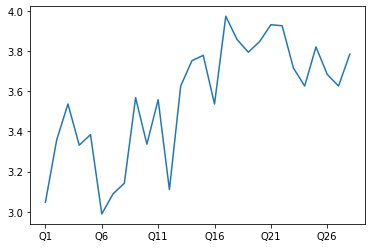

In [186]:
gr11_clear.loc[:,"Q1":"Q28"].mean().plot()

 - По графику можно увидеть, что средняя оценка достигает наименьших значений у Q1, Q6 и Q12.

### Стандартное отклонение 

<AxesSubplot:>

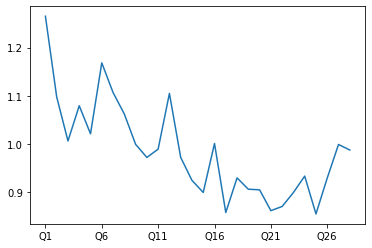

In [200]:
gr11_clear.loc[:,"Q1":"Q28"].std().plot()

 - График показывает, что стандартное отклонение хоть и нестабильно, но снижается от первого вопроса к последнему. Среднее его значение равно:

In [201]:
gr11_clear.loc[:,"Q1":"Q28"].std().mean()

0.9854542338961928

### Медиана

In [172]:
np.median(gr11_clear, axis=0)

array([ 2., 11.,  1.,  2.,  3.,  3.,  3.,  4.,  3.,  3.,  3.,  3.,  3.,
        4.,  3.,  4.,  3.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.])

 - Значения медианы не представляют особого интереса для наших данных(как $min$ и $max$ естественно), ее значениями являются 3 и 4.

### Квартили

<AxesSubplot:>

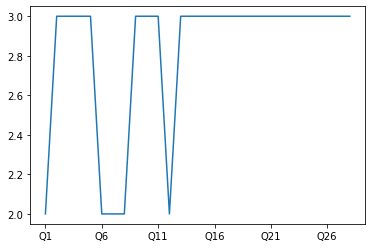

In [204]:
gr11_clear.loc[:,"Q1":"Q28"].quantile(0.25).plot()

<AxesSubplot:>

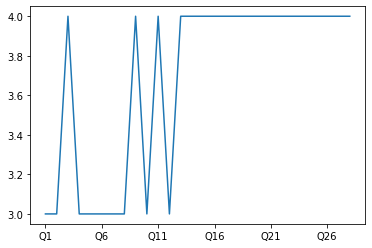

In [202]:
gr11_clear.loc[:,"Q1":"Q28"].quantile(0.5).plot()

<AxesSubplot:>

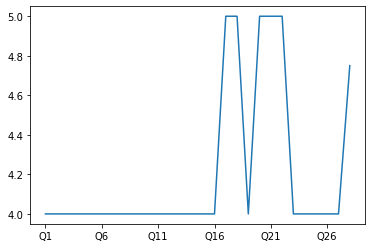

In [205]:
gr11_clear.loc[:,"Q1":"Q28"].quantile(0.75).plot()

- Наиболее встречаемое значение квартиля 25% - 3 
- Наиболее встречаемое значение квартиля 50% - 4
- Наиболее встречаемое значение квартиля 75% - 4
- Также интересным замечанием будет то, что диапазон значений каждого квартиля по отдельности равен еденице, не больше ни меньше.

### Анализ матрицы корреляций

In [206]:
gr11_corr = gr11_clear.corr()
gr11_corr

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
instr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nb.repeat,NaN,NaN,1.000000,-0.092276,-0.040683,-0.035153,-0.137116,-0.174596,-0.149223,-0.186168,...,-0.020772,-0.015941,-0.020214,-0.037799,-0.037559,-0.013758,-0.029224,-0.064354,0.020598,0.034196
attendance,NaN,NaN,-0.092276,1.000000,0.377517,-0.027535,0.029942,0.075956,0.050380,0.094597,...,0.112533,0.103670,0.118928,0.149399,0.129158,0.103169,0.125861,0.027654,0.003287,0.123728
difficulty,NaN,NaN,-0.040683,0.377517,1.000000,0.021913,0.032022,0.024279,0.051134,0.019840,...,-0.062610,-0.010299,-0.021950,-0.038417,-0.001928,-0.001625,-0.005515,-0.006996,-0.032429,-0.013880
Q1,NaN,NaN,-0.035153,-0.027535,0.021913,1.000000,0.738320,0.507869,0.705299,0.493790,...,0.160915,0.126576,0.138981,0.205124,0.263163,0.266109,0.193905,0.269418,0.227651,0.148028
Q2,NaN,NaN,-0.137116,0.029942,0.032022,0.738320,1.000000,0.702076,0.725705,0.646387,...,0.324508,0.311202,0.300406,0.376973,0.371877,0.420720,0.384707,0.407299,0.383365,0.325626
Q3,NaN,NaN,-0.174596,0.075956,0.024279,0.507869,0.702076,1.000000,0.605251,0.565811,...,0.452681,0.410441,0.396959,0.529267,0.479860,0.463013,0.481837,0.437241,0.437797,0.383721
Q4,NaN,NaN,-0.149223,0.050380,0.051134,0.705299,0.725705,0.605251,1.000000,0.594567,...,0.319058,0.306937,0.269403,0.364397,0.359540,0.307685,0.322982,0.437565,0.311977,0.335740
Q5,NaN,NaN,-0.186168,0.094597,0.019840,0.493790,0.646387,0.565811,0.594567,1.000000,...,0.412001,0.338960,0.325039,0.401535,0.482990,0.451602,0.358368,0.390913,0.453012,0.324254


<AxesSubplot:>

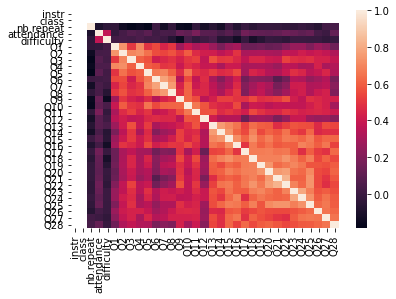

In [254]:
corr = gr11_clear.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


Были выбраны самые интересные зависимости, значение корреляции которых превышало 0.7
- Сложность и посещаемость не коррелируют с ответами на вопросы
- Q1, Q2 и Q4 хорошо коррелируют. В самом деле, они значат практически одно и то же: четкая выкладка структуры курса в самом начале и соотвествие ей.
- Приблизительно такую же корреляцию имеют Q2 и Q4. 
- Q6 и Q21. Довольно неочевидно, но актуальность учебной литературы и положительный подход преподавателя к студентам неплохо зависят друг от друга.
- Q18 и Q22. Забавная зависимость: Преподаватель, хорошо владеющий речью, с уважением относился к мнению студентов и прислушивался к их словам.
- Q19 и Q20. Преподаватель, желающий помочь студентам в сдаче курса использовал время классного часа с умом.

## Сравнение результатов анализа

- Как и в 9 классе, в 11 почти все проходят курс с первого раза. 
- Посещаемость студентов при округлении становится примерно равна 2 - низкая посещаемость, но тем не менее в 9 группе посещаемость выше, чем в 11.
- Сложность курса для 9 и 11 группы приблизительно равна 3.
- Значения квартилей на 25, 50 и 75 % в классах достаточно сильно рознятся: первый квартиль в 9 классе очень нестабилен и составляет примерно 2.54, а в 11 - 3, в то время как второй квартиль в 9 классе больше к 3, а в 11 к 4, хотя для третьего квартиля в обоих группах - 4.
- Также можно заметить, что матрицы корреляции имеют схожие значения, что означает, что для каждого класса вопросы, которые имеют прочную взаимосвязь - будут иметь такую же и для другого класса.
- Если сравнить графики средних значений у обоих групп, можно заметить что на вопросы с 16 по 21 ставили самые высокие оценки. Это позволяет сделать вывод, что преподаватели с идентификаторами 2 и 3 прикладывали большие усилия для обучения студентов: желание работать, ясность требований, красивая и поставленная речь, продуктивные часы занятий.
- Значения стандартного отклонения в обоих классах сходятся к еденице в последний вопросах.
- В среднем студенты 11 класса ставили более высокие оценки(среднее среди всех вопросов 3.56 против 3.24)
- Приблизительно одинаковое число строк в процентном соотношении было удалено из исходного датасета на этапе удаления выбросов и мусорных данных. Другими словами, соотношение терпеливых студентов к тем, кто просто ставил 1 в каждом вопросе одинаково в обоих группах, и составляет половину
- Сравнивая обе группы, выделяются вопросы с наименьшими средними значениями в обоих. Это вопросы Q1, Q5-Q8 и Q12. Эта информация означает, что преподавателям необходимо поработать над:
 * представлением содержания семестрового курса, метода обучения и системы оценивания в начале обучения
 * разбором домашних работ, проведением лабораторных работ, обсуждением и другой исследовательской деятельностью
 * актуальностью учебной литературы
 * Расширением кругозора и улучшением восприятия мира. Данный параметр худший в обоих группах, студенты не могут взглянуть на мир с другой стороны и новой точки зрения. Хотя так ли это нужно?

## Уменьшение размерности

In [233]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [234]:
pca = PCA()

In [235]:
U = pca.fit_transform(gr9_clear)

In [236]:
U.shape

(275, 33)

In [237]:
pca.explained_variance_ratio_

array([4.66182002e-01, 9.85433679e-02, 6.06632947e-02, 4.06179358e-02,
       3.26149478e-02, 2.74047984e-02, 2.59166135e-02, 2.33834648e-02,
       2.00395405e-02, 1.80790744e-02, 1.66106204e-02, 1.48243526e-02,
       1.37518701e-02, 1.24003542e-02, 1.20210717e-02, 1.12623005e-02,
       1.03936325e-02, 1.00583165e-02, 9.74495136e-03, 9.17927443e-03,
       8.48948574e-03, 7.67118405e-03, 7.54362165e-03, 6.55800371e-03,
       6.26733144e-03, 6.05892187e-03, 5.40524855e-03, 5.10509110e-03,
       5.04168993e-03, 4.85326729e-03, 3.31437091e-03, 9.20961238e-32,
       2.29631851e-33])

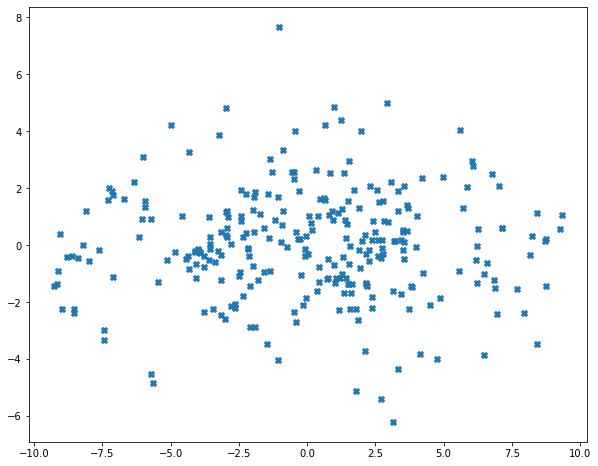

In [238]:
plt.figure(figsize=(10, 8))
plt.scatter(U[:, 0], U[:, 1],  
            cmap='Dark2', marker='X')
plt.show()

In [239]:
pca.components_

array([[ 1.32972043e-18,  5.55111512e-17,  1.83750558e-02, ...,
        -1.84811672e-01, -1.89002377e-01, -1.70546713e-01],
       [-4.97143443e-18,  1.66533454e-16,  4.61496340e-04, ...,
         1.15428134e-01,  1.36051916e-01,  1.78491848e-01],
       [ 1.45259070e-19, -2.06432094e-16, -6.69824779e-03, ...,
        -1.05781586e-01, -9.45500443e-02, -7.68387763e-02],
       ...,
       [-1.74732927e-17,  6.93889390e-18, -2.17407434e-02, ...,
        -1.04693193e-01,  2.56056065e-02, -3.23935109e-02],
       [ 6.62779962e-03, -9.99978036e-01,  1.14333639e-15, ...,
         5.45973281e-17, -1.09236487e-16, -2.44430777e-17],
       [ 9.99978036e-01,  6.62779962e-03, -7.18407753e-17, ...,
        -2.46326550e-18,  1.56430349e-17,  2.28733099e-18]])

In [240]:
gr9_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275 entries, 4466 to 5036
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instr       275 non-null    int64  
 1   class       275 non-null    int64  
 2   nb.repeat   275 non-null    int64  
 3   attendance  275 non-null    int64  
 4   difficulty  275 non-null    int64  
 5   Q1          275 non-null    float64
 6   Q2          275 non-null    int64  
 7   Q3          275 non-null    int64  
 8   Q4          275 non-null    int64  
 9   Q5          275 non-null    int64  
 10  Q6          275 non-null    int64  
 11  Q7          275 non-null    int64  
 12  Q8          275 non-null    int64  
 13  Q9          275 non-null    int64  
 14  Q10         275 non-null    int64  
 15  Q11         275 non-null    int64  
 16  Q12         275 non-null    int64  
 17  Q13         275 non-null    int64  
 18  Q14         275 non-null    int64  
 19  Q15         275 non-null 

In [244]:
U = pd.DataFrame(U, columns=['instr','class','attendance' ,'difficulty' ,'nb.repeat', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10','Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18','Q19','Q20','Q21','Q22','Q23','Q24','Q25','Q26','Q27','Q28'])

<AxesSubplot:>

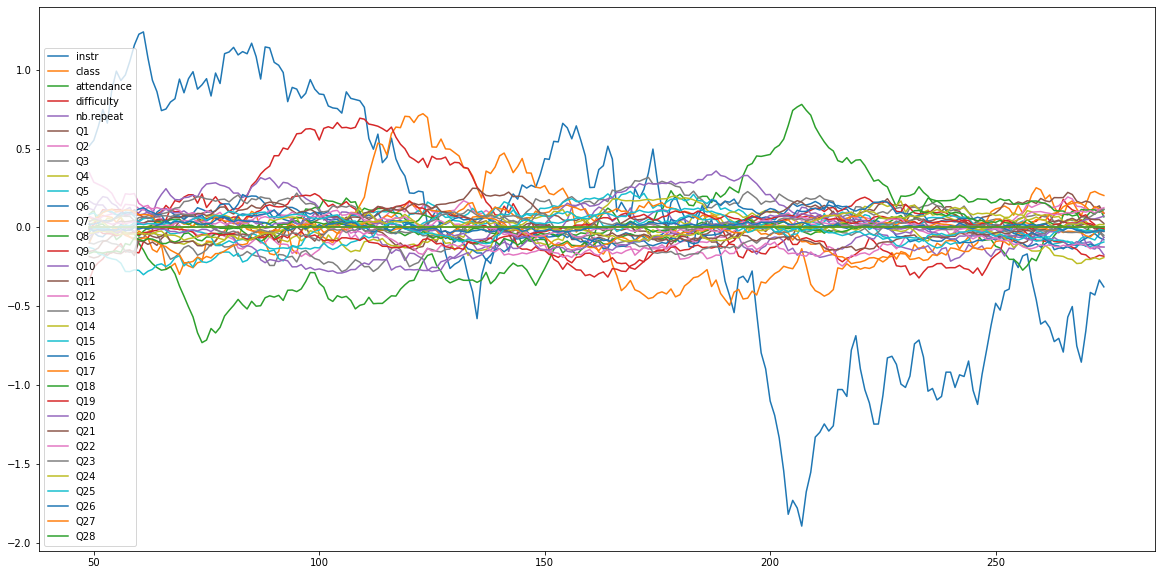

In [249]:
U.rolling(window=50).mean().plot(figsize=(20, 10))

In [246]:
from sklearn.manifold import TSNE

In [247]:
tsne = TSNE(perplexity=15)
Z = tsne.fit_transform(gr9_clear)
Z.shape

(275, 2)

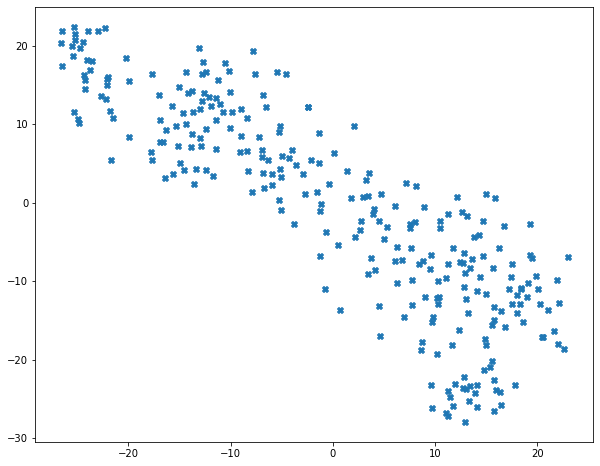

In [248]:
plt.figure(figsize=(10, 8))
plt.scatter(Z[:, 0], Z[:, 1], 
            cmap='Dark2', marker='X')
plt.show()

## Итоговый вывод

Анализ полученных нами данных позволяет отслеживать компетентность преподавателей, а также узнать насколько на данный момент актуальны курсы, что дает возможность корректировать программу обучения. Можно заметить, что данные достаточно полные и по ним можно определить достоверность оценок за сложность курса посредством определения посещаемости, соответственно, данная информация дает нам знания не только о качестве преподавания со стороны учителя, но и качестве обучения со стороны учеников.